In [1]:
print('james')

james


In [2]:
from numpy import *

In [5]:
randMat = mat(random.rand(4,4))

In [6]:
randMat.I

matrix([[  1.37498723,  -0.48537447,   7.24222107,  -4.57835412],
        [ -0.18598893,   0.9706691 , -10.32726283,   5.00723224],
        [  0.96455054,  -2.30418092,  13.2530226 ,  -4.65266485],
        [ -1.38751792,   1.73618134,  -6.10688541,   3.4595895 ]])

In [7]:
randMat * randMat.I

matrix([[ 1.00000000e+00,  1.11022302e-16, -8.88178420e-16,
          1.11022302e-16],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         -4.44089210e-16],
        [ 0.00000000e+00, -3.33066907e-16,  1.00000000e+00,
         -2.22044605e-16],
        [ 0.00000000e+00, -4.44089210e-16,  4.44089210e-16,
          1.00000000e+00]])

In [10]:
import numpy as np

In [11]:
def file2matrix(filename):
    love_dictionary = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = np.zeros((numberOfLines, 3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [12]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

In [15]:
datingDataMat.shape

(1000, 3)

In [18]:
size(datingLabels)

1000

In [19]:
import matplotlib
import matplotlib.pyplot as plt

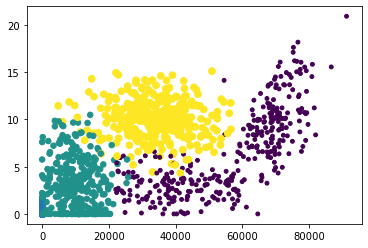

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:,2])
ax.scatter(datingDataMat[:, 0], datingDataMat[:,1], 15.0*array(datingLabels), 15*array(datingLabels))
plt.show()

In [30]:
ax.scatter(datingDataMat[:, 1], datingDataMat[:,2], 15.0*array(datingLabels), 15*array(datingLabels))

In [31]:
plt.show()

In [38]:
from kNN import autoNorm
normMat, ranges, minVals = autoNorm(datingDataMat)

In [39]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

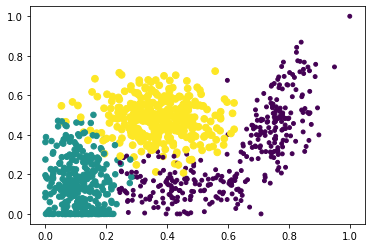

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(normMat[:, 0], normMat[:,1], 15.0*array(datingLabels), 15*array(datingLabels))
plt.show()

In [48]:
import kNN as k

In [54]:
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = k.classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 5)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print(errorCount)

In [55]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe